# Decision Tree

In [26]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('datasets/drug200.csv')
data.shape

(200, 6)

In [4]:
data.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [6]:
x=data.drop(columns='Drug')
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [18]:
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x['Sex']=le_sex.transform(x['Sex'])


ValueError: y contains previously unseen labels: '0'

In [22]:
x['Cholesterol'].value_counts(),x['BP'].value_counts()

(Cholesterol
 HIGH      103
 NORMAL     97
 Name: count, dtype: int64,
 BP
 HIGH      77
 LOW       64
 NORMAL    59
 Name: count, dtype: int64)

In [23]:
le_BP=preprocessing.LabelEncoder()
le_BP.fit(['HIGH','LOW','NORMAL'])
x['BP']=le_BP.transform(x['BP'])
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,HIGH,25.355
1,47,1,1,HIGH,13.093
2,47,1,1,HIGH,10.114
3,28,0,2,HIGH,7.798
4,61,0,1,HIGH,18.043
...,...,...,...,...,...
195,56,0,1,HIGH,11.567
196,16,1,1,HIGH,12.006
197,52,1,2,HIGH,9.894
198,23,1,2,NORMAL,14.020


In [24]:
le_Cholesterol =preprocessing.LabelEncoder()
le_Cholesterol.fit(['NORMAL','HIGH'])
x['Cholesterol']=le_Cholesterol.transform(x['Cholesterol'])
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [25]:
y=data['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

# setting up decision tree

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=3)

In [29]:
xtrain.shape,ytrain.shape, xtest.shape,ytest.shape

((140, 5), (140,), (60, 5), (60,))

# modeling

In [30]:
drugTree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
drugTree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction

In [32]:
predTree=drugTree.predict(xtest)
predTree

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

# Evaluation

In [34]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [35]:
metrics.accuracy_score(ytest,predTree)

0.9833333333333333

# Visaulization

In [36]:
from sklearn.tree import export_graphviz

In [39]:
export_graphviz(drugTree,out_file='tree.dot',filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

In [38]:
!dot -Tpng tree.dot -o tree.png

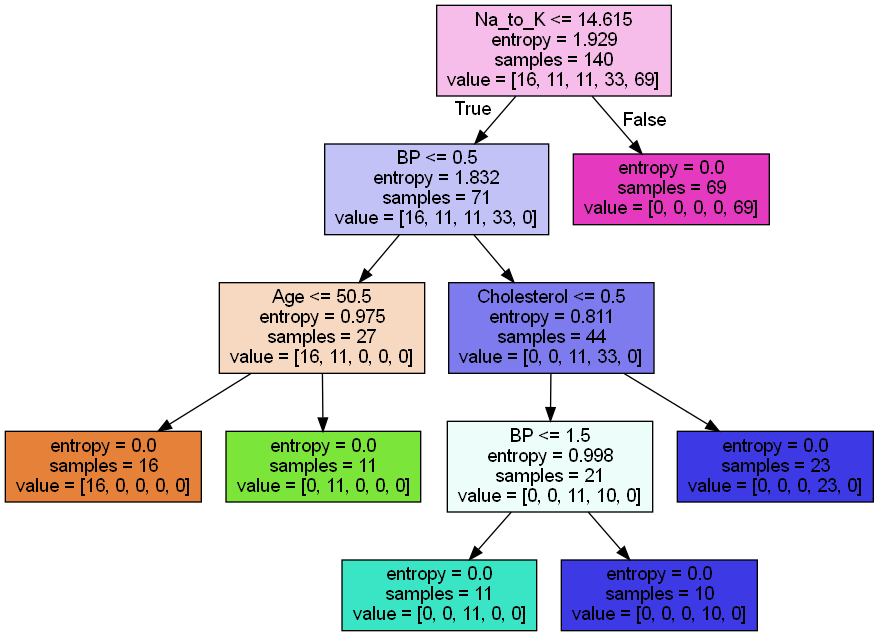